In [23]:
from sklearn.datasets import fetch_california_housing

# Fetching California Housing dataset
housing = fetch_california_housing()

# Printing the feature names
print("Feature names:")
print(housing.feature_names)

# Printing the first five rows of data
print("\nFirst five rows of data:")
print(housing.data[:5])

# Printing the first five target values (median house values)
print("\nFirst five target values:")
print(housing.target[:5])


Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First five rows of data:
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]

First five target values:
[4.526 3.585 3.521 3.413 3.422]


<ipython-input-24-00369c18a1b6>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


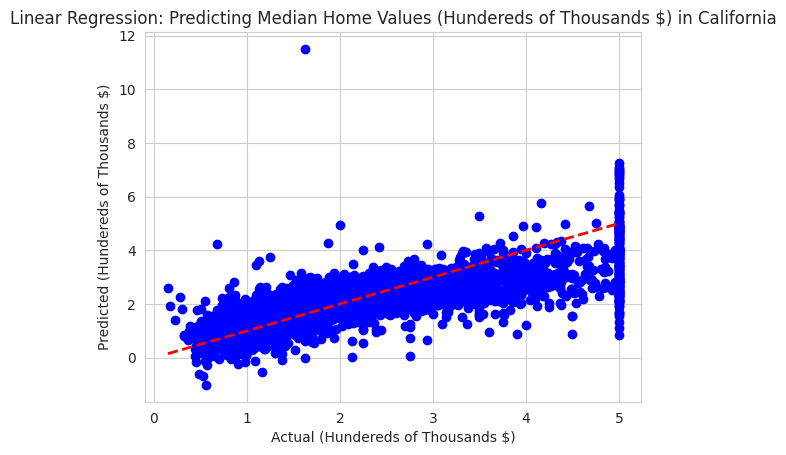

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:08:08   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.0233      0.728    -50.835      0.0

In [24]:
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Fetching California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = sm.OLS(y_train, X_train)

# Fitting the model to the training data
results = model.fit()

# Making predictions on the testing data
y_pred = results.predict(X_test)

# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual (Hundereds of Thousands $)')
plt.ylabel('Predicted (Hundereds of Thousands $)')
plt.title('Linear Regression: Predicting Median Home Values (Hundereds of Thousands $) in California')
plt.show()

# Printing the summary results
print(results.summary(xname=['Intercept'] + list(housing.feature_names)))


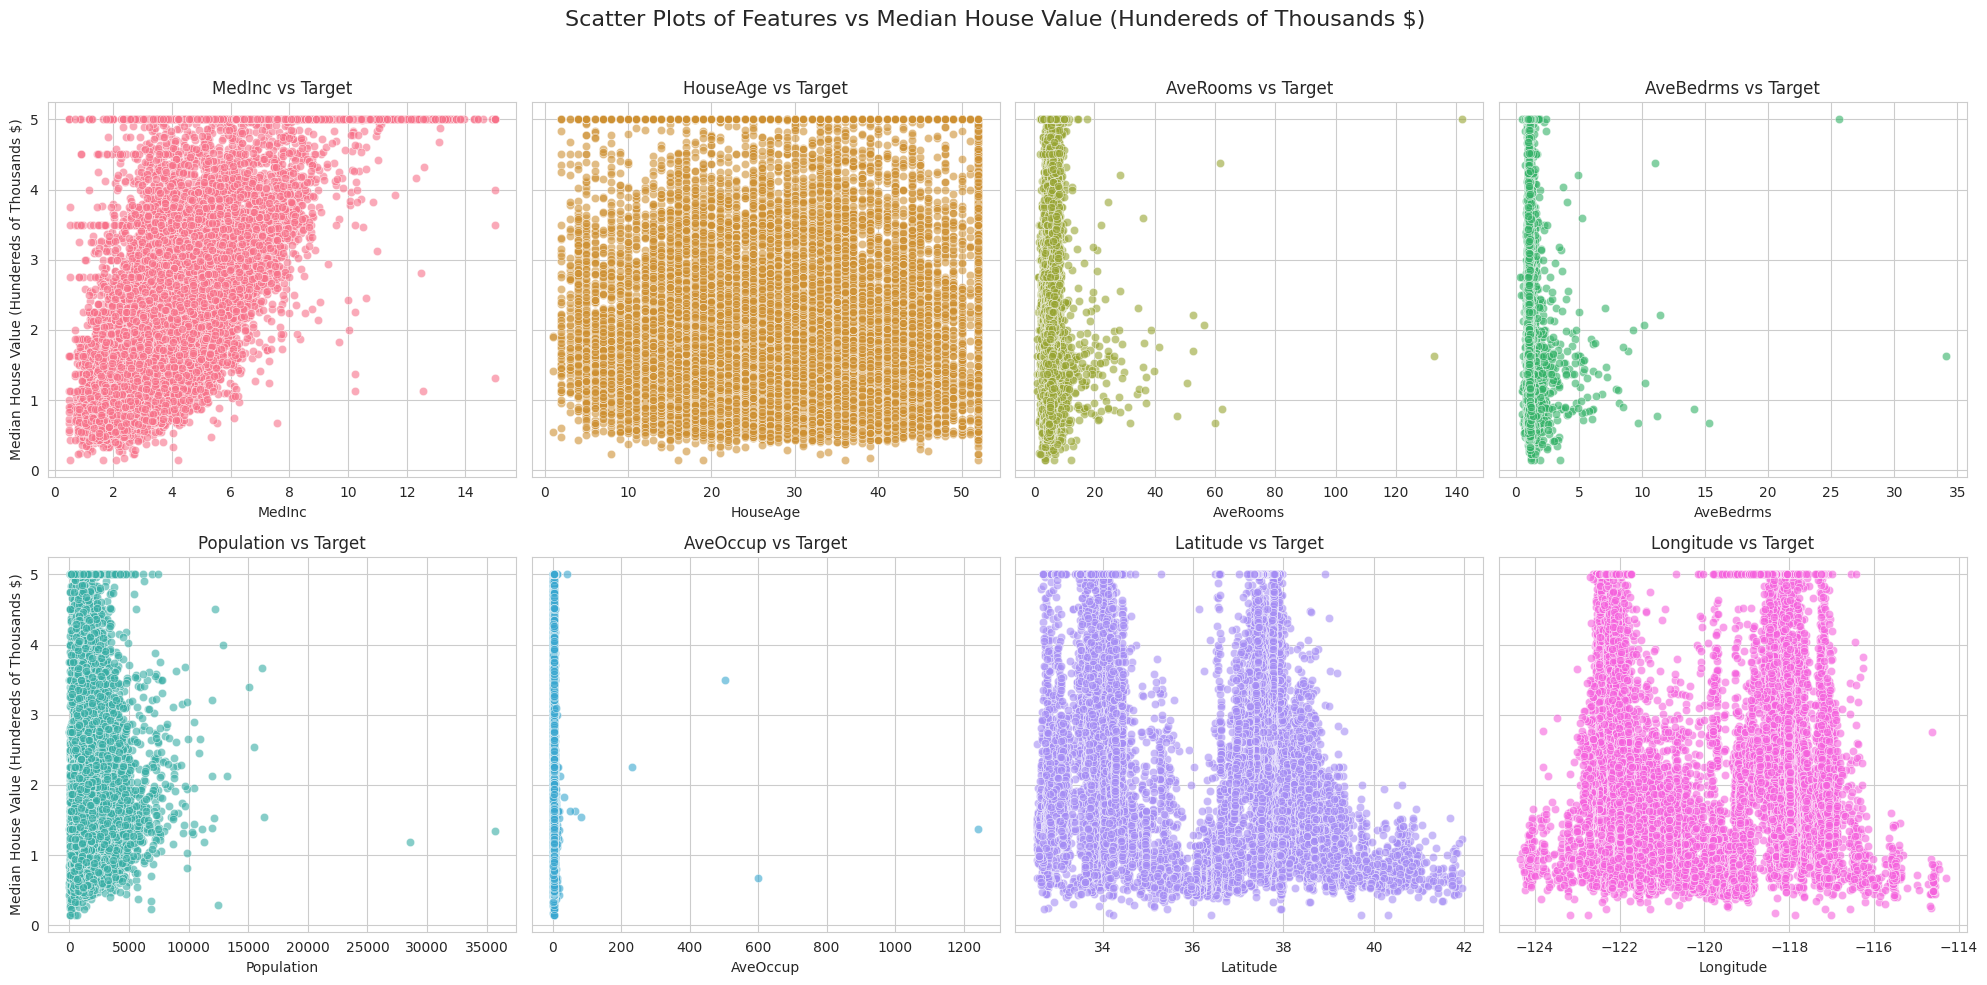

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Fetching California Housing dataset
housing = fetch_california_housing()

# Number of features
n_features = housing.data.shape[1]

# Setting a modern and colorful style
sns.set_style("whitegrid")
palette = sns.color_palette("husl", n_features)  # different colors for each feature

# Creating a grid of subplots with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True)

# Plotting each feature against the target using Seaborn with unique color
for i in range(n_features):
    row = i // 4
    col = i % 4
    sns.scatterplot(x=housing.data[:, i], y=housing.target, ax=axes[row, col], color=palette[i], edgecolor='w', alpha=0.6)
    axes[row, col].set_title(f'{housing.feature_names[i]} vs Target', fontsize=12)
    axes[row, col].set_xlabel(housing.feature_names[i], fontsize=10)
    axes[row, col].set_ylabel('Median House Value (Hundereds of Thousands $)', fontsize=10)

plt.suptitle('Scatter Plots of Features vs Median House Value (Hundereds of Thousands $)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


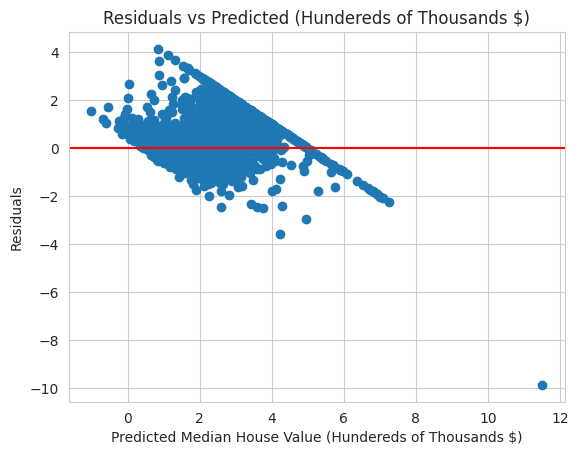

In [26]:
# Calculate the residuals for the test data
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Median House Value (Hundereds of Thousands $)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Hundereds of Thousands $)')
plt.show()


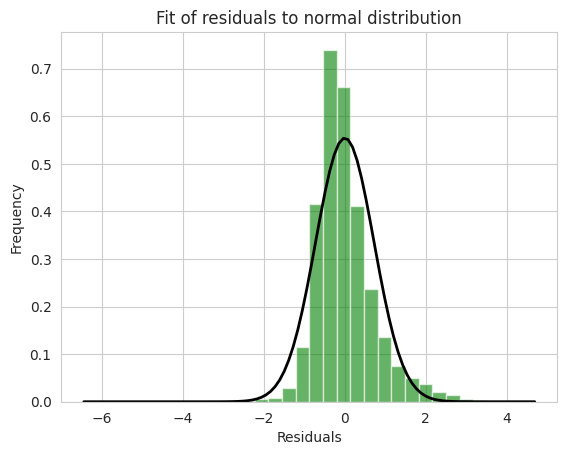

In [27]:
import numpy as np
from scipy.stats import norm

residuals = results.resid

# Plotting the histogram
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')

# Fitting a normal distribution to the residuals
mu, std = norm.fit(residuals)

# Plotting the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title("Fit of residuals to normal distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


<ipython-input-28-ea22cd49ecf7>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


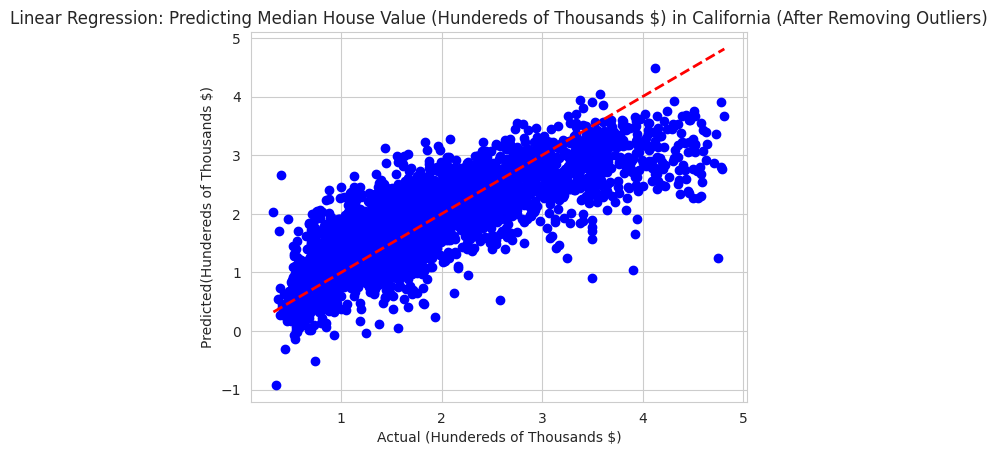

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     2881.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:08:14   Log-Likelihood:                -11150.
No. Observations:               13049   AIC:                         2.232e+04
Df Residuals:                   13040   BIC:                         2.239e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.7486      0.707    -46.341      0.0

In [28]:
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fetching California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target.reshape(-1, 1)

# Combining features and target into one array
data_combined = np.hstack([X, y])

# Removing outliers using the 1.5*IQR rule
Q1 = np.percentile(data_combined, 25, axis=0)
Q3 = np.percentile(data_combined, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = (data_combined >= lower_bound) & (data_combined <= upper_bound)
data_filtered = data_combined[mask.all(axis=1)]

# Splitting data into features and target
X_filtered = data_filtered[:, :-1]
y_filtered = data_filtered[:, -1]

# Adding a constant term for the intercept
X_filtered = sm.add_constant(X_filtered)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Creating a linear regression model
model = sm.OLS(y_train, X_train)

# Fitting the model to the training data
results = model.fit()

# Making predictions on the testing data
y_pred = results.predict(X_test)

# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual (Hundereds of Thousands $)')
plt.ylabel('Predicted(Hundereds of Thousands $)')
plt.title('Linear Regression: Predicting Median House Value (Hundereds of Thousands $) in California (After Removing Outliers)')
plt.show()

# Printing the summary results
print(results.summary(xname=['Intercept'] + list(housing.feature_names)))


<ipython-input-29-d6ac1a42c0b8>:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_filtered[:, feature_index], y_filtered, c=palette[feature_index])


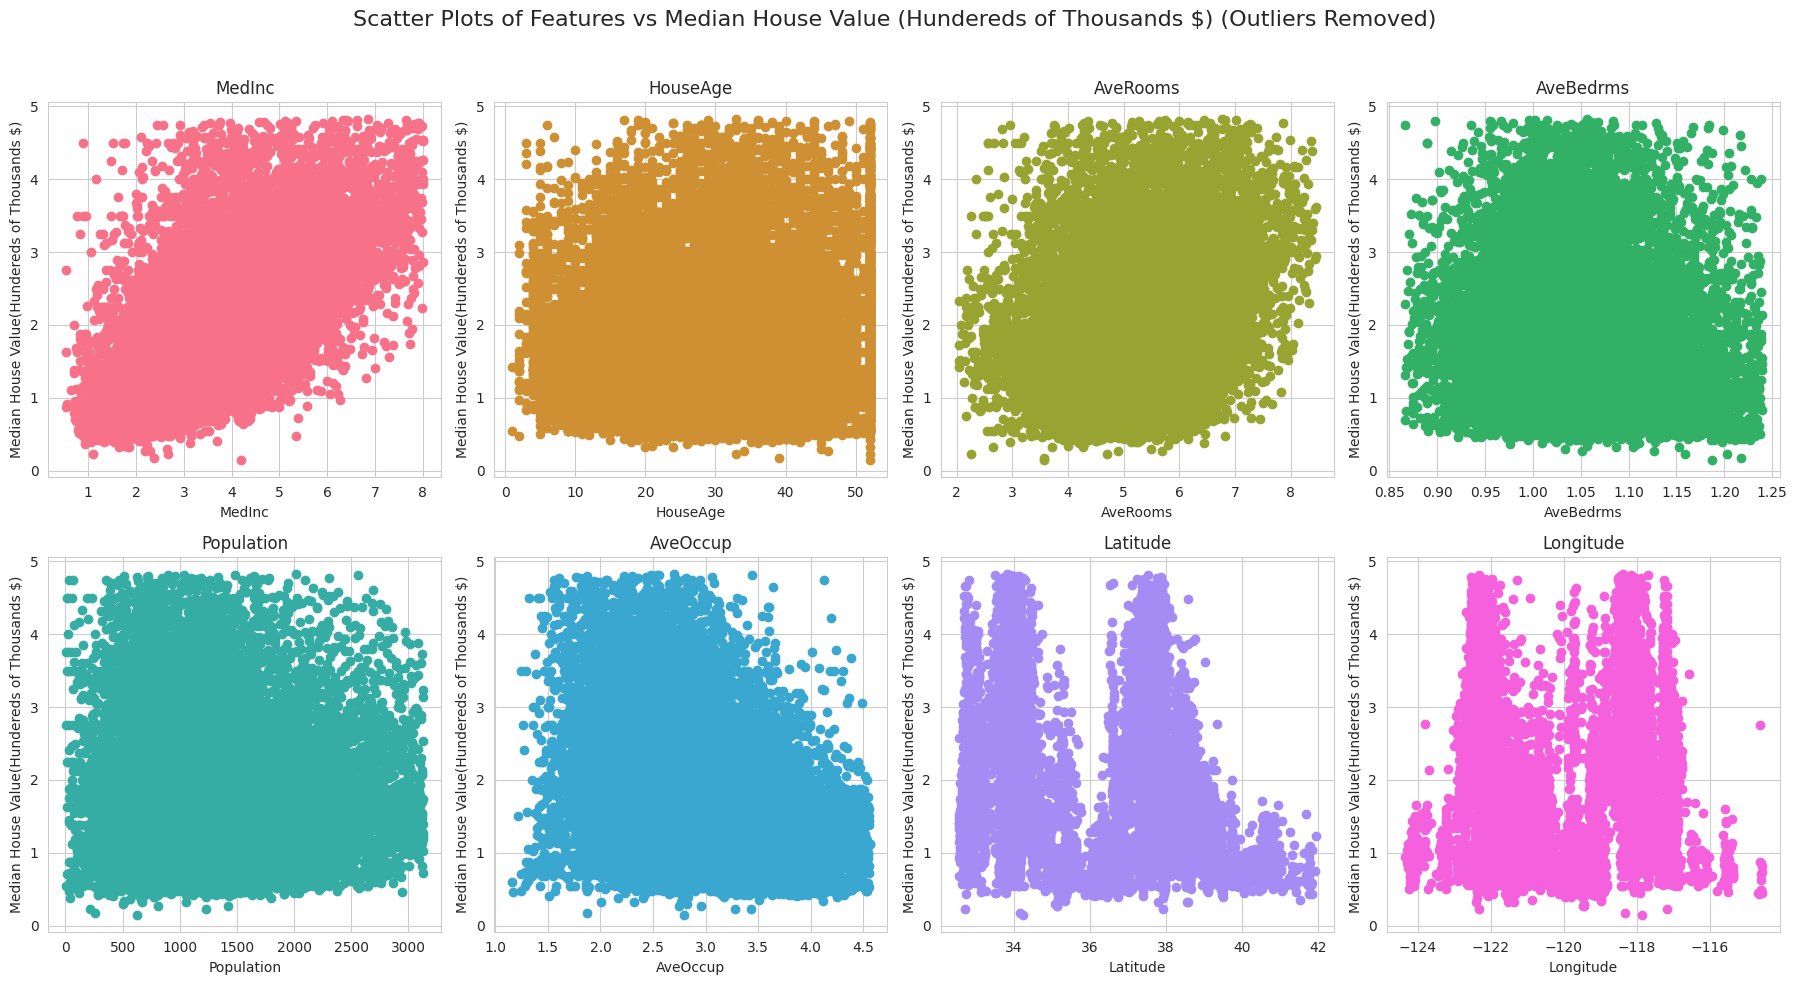

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Set a modern and colorful style
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 8) # 8 different colors for 8 features

# Fetching California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target.reshape(-1, 1)

# Concatenating X and y for simultaneous outlier removal
data = np.concatenate([X, y], axis=1)

# Removing outliers using 1.5 * IQR rule
Q1 = np.percentile(data, 25, axis=0)
Q3 = np.percentile(data, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = (data >= lower_bound) & (data <= upper_bound)
mask_all = mask.all(axis=1)
data_filtered = data[mask_all]

# Splitting the filtered data back into X and y
X_filtered = data_filtered[:, :-1]
y_filtered = data_filtered[:, -1]

# Determining the layout for the subplots
n_rows = 2
n_cols = 4

# Creating a figure with a specific size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 10))

# Plotting scatter plots for each feature against the target, after removing outliers
for feature_index, feature_name in enumerate(housing.feature_names):
    plt.subplot(n_rows, n_cols, feature_index + 1)
    plt.scatter(X_filtered[:, feature_index], y_filtered, c=palette[feature_index])
    plt.xlabel(feature_name)
    plt.ylabel('Median House Value(Hundereds of Thousands $)')
    plt.title(feature_name)

plt.suptitle('Scatter Plots of Features vs Median House Value (Hundereds of Thousands $) (Outliers Removed)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


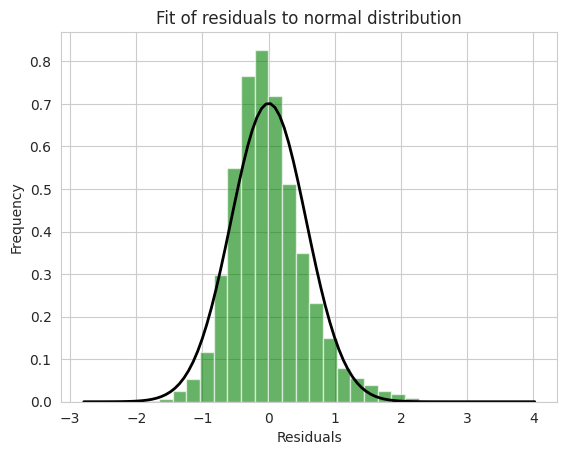

In [30]:
residuals = results.resid
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
mu, std = norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit of residuals to normal distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


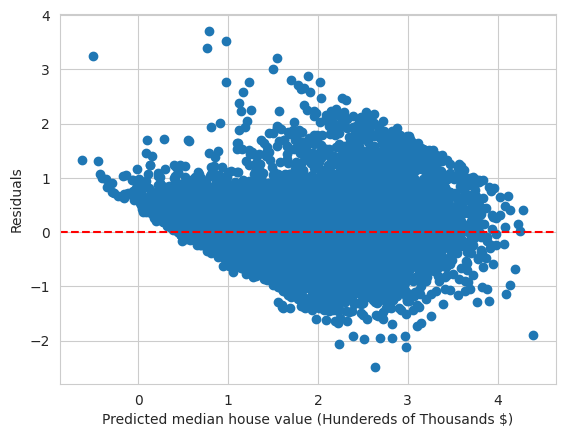

In [31]:
# Residual plot
plt.scatter(results.predict(), results.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted median house value (Hundereds of Thousands $)')
plt.ylabel('Residuals')
plt.show()
